In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [51]:
#import data
fmnist_train = pd.read_csv("C://Users//Nicho//OneDrive//Desktop//MNIST//fashion-mnist_train//fashion-mnist_train.csv")
fmnist_test = pd.read_csv("C://Users//Nicho//OneDrive//Desktop//MNIST//fashion-mnist_test//fashion-mnist_test.csv")

## Data Description
 The response variable consists of the following 10 categories: 
 * 0 T-shirt/top
 * 1 Trouser
 * 2 Pullover
 * 3 Dress
 * 4 Coat
 * 5 Sandal
 * 6 Shirt
 * 7 Sneaker
 * 8 Bag
 * 9 Ankle boot
 
The data frame `fmnist_train` contains 60,000 rows by 785 columns. Each row is an image, which has $28 \times 28 = 784$ pixels. The first column is the class label (response variable, i.e. the category of clothing). The remaining 784 columns are the pixels (with the darkness of each pixel represented as a number between 0-255).

In [52]:
#check dimensions and class distribution
print("Training set dimensions:", fmnist_train.shape)
print("Test set dimensions:", fmnist_test.shape)
print("\nTraining set class distribution:")
print(fmnist_train['label'].value_counts().sort_index())
print("\nTest set class distribution:")
print(fmnist_test['label'].value_counts().sort_index())

Training set dimensions: (60000, 785)
Test set dimensions: (10000, 785)

Training set class distribution:
label
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: count, dtype: int64

Test set class distribution:
label
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
Name: count, dtype: int64


## Plotting Image

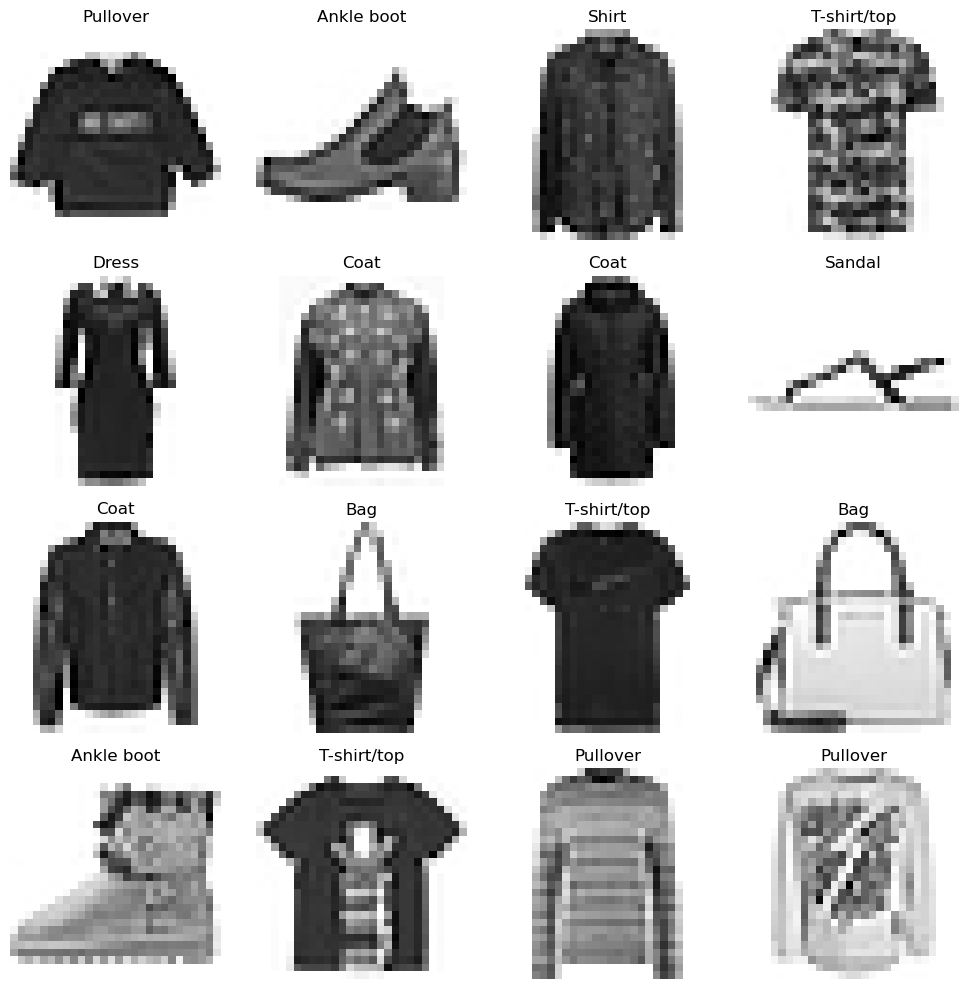

In [53]:
# category names
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
              "Sandal","Shirt","Sneaker","Bag","Ankle boot"]
# the first 16 training images
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    img = fmnist_train.iloc[i, 1:].values.reshape(28,28)
    plt.imshow(img, cmap='gray_r')
    plt.title(class_names[fmnist_train.iloc[i,0]])
    plt.axis('off')
plt.tight_layout()
plt.show()

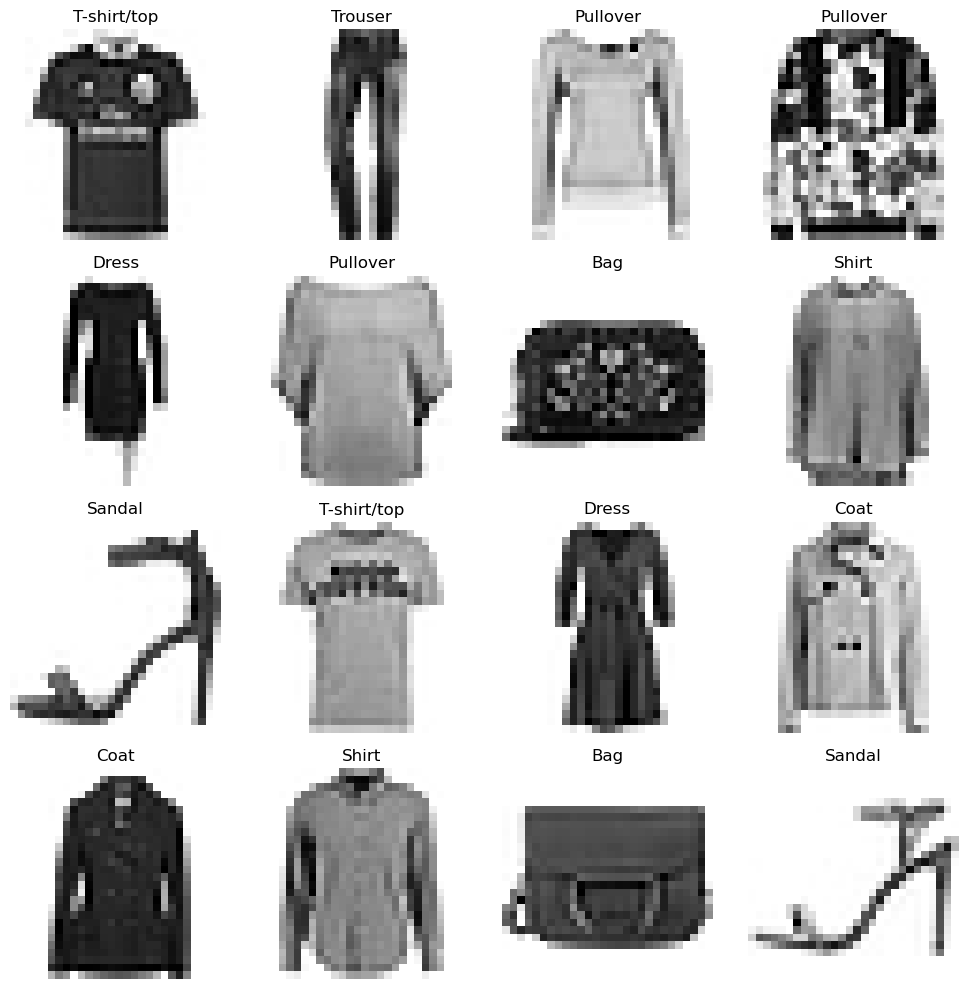

In [12]:
# the first 16 test images
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    img = fmnist_test.iloc[i, 1:].values.reshape(28,28)
    plt.imshow(img, cmap='gray_r')
    plt.title(class_names[fmnist_test.iloc[i, 0]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [54]:
#Prepare data
x_train = fmnist_train.drop('label',axis=1)
y_train = fmnist_train['label']
x_test = fmnist_test.drop('label',axis=1)
y_test = fmnist_test['label']

In [55]:
#train decision tree
tree1 = DecisionTreeClassifier()
tree1.fit(x_train, y_train)

DecisionTreeClassifier()

In [56]:
#Prediction and evaluation
pred_tree1 = tree1.predict(x_test)

In [57]:
# Confusion matrix 
cm = confusion_matrix(y_test,pred_tree1)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[724   9  22  41  12   3 172   1  15   1]
 [  4 964   4  19   3   1   4   0   1   0]
 [ 22   6 683  19 143   2 112   1  12   0]
 [ 42  26  17 813  53   1  35   2   9   2]
 [ 10   6 144  44 669   0 119   0   7   1]
 [  1   1   1   2   0 879   3  62  19  32]
 [172   9 101  37 103   1 561   0  16   0]
 [  0   0   0   1   0  55   0 870   4  70]
 [ 16   0  20   7  12   8  18  11 905   3]
 [  0   0   1   1   1  26   2  66   3 900]]


In [59]:
# calculate accuracy 
accuracy = accuracy_score(y_test, pred_tree1)
Decision_Tree_Accuracy = accuracy
print(f"\nAccuracy: {accuracy:.4f}")


Accuracy: 0.7968


## Random Forest Model

In [60]:
# First random forest model
np.random.seed(123)
rf1 = RandomForestClassifier(n_estimators=200, max_features = 28)
rf1.fit(x_train, y_train)

RandomForestClassifier(max_features=28, n_estimators=200)

In [61]:
#Prediction and Evaluation
pred_rf1 = rf1.predict(x_test)

In [62]:
#confusion matrix 
cm = confusion_matrix(y_test, pred_rf1)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[862   0  12  28   1   1  85   0  11   0]
 [  2 972   6  13   1   1   5   0   0   0]
 [  7   2 810  14 106   0  52   0   9   0]
 [ 17   9   9 925  20   0  20   0   0   0]
 [  1   0  55  30 871   0  40   0   3   0]
 [  0   0   0   0   0 949   0  36   4  11]
 [169   1 100  29  75   0 611   0  15   0]
 [  0   0   0   0   0  17   0 927   0  56]
 [  1   1   8   0   3   1   6   2 977   1]
 [  0   0   0   0   0   7   1  38   3 951]]


In [64]:
# calculate accuracy 
accuracy = accuracy_score(y_test, pred_rf1)
Random_Forest_Accuracy_Model1 = accuracy
print(f"\nAccuracy: {accuracy:.4f}")


Accuracy: 0.8855


In [65]:
# Individual Category Accuracy
shirt_accuracy = cm[6,6]/1000
bag_accuracy = cm[8,8]/1000
print(f"\nShirt accuracy: {shirt_accuracy:.1%}")
print(f"Bag accuracy: {bag_accuracy:.1%}")


Shirt accuracy: 61.1%
Bag accuracy: 97.7%


## Additional Random Forest Model

In [66]:
np.random.seed(123)
rf2 = RandomForestClassifier(n_estimators = 150, max_features = 50)
rf2.fit(x_train, y_train)

RandomForestClassifier(max_features=50, n_estimators=150)

In [67]:
pred_rf2 = rf2.predict(x_test)

In [68]:
cm = confusion_matrix(y_test, pred_rf2)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[865   0  10  27   1   1  85   0  11   0]
 [  3 974   2  14   1   1   5   0   0   0]
 [  9   2 809  11 110   0  49   0  10   0]
 [ 19   4   9 930  22   0  15   0   1   0]
 [  1   0  64  28 861   0  43   0   3   0]
 [  0   0   0   0   0 949   0  35   5  11]
 [150   1 100  29  76   0 627   0  17   0]
 [  0   0   0   0   0  15   0 933   0  52]
 [  1   1   8   0   3   2   6   2 977   0]
 [  0   0   0   0   0   7   1  38   2 952]]


In [69]:
accuracy = accuracy_score(y_test, pred_rf2)
Random_Forest_Accuracy_Model2 = accuracy
print(f"\nAccuracy: {accuracy:.4f}")


Accuracy: 0.8877


## Neural Network

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [37]:
# Normalize the p-value 
X_train = x_train / 255
X_test = x_test / 255

In [38]:
Y_train = to_categorical(y_train, num_classes = 10)
Y_test = to_categorical(y_test, num_classes = 10)

In [39]:
model = Sequential([
    Flatten(input_shape = (784,)), 
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10,activation='softmax')
])

C:\Users\Nicho\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
#compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [41]:
## Training the neural network
history = model.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test,Y_test)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8243 - loss: 0.4963 - val_accuracy: 0.8514 - val_loss: 0.4198
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8652 - loss: 0.3687 - val_accuracy: 0.8679 - val_loss: 0.3611
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8764 - loss: 0.3366 - val_accuracy: 0.8712 - val_loss: 0.3590
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8858 - loss: 0.3102 - val_accuracy: 0.8770 - val_loss: 0.3437
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8898 - loss: 0.2994 - val_accuracy: 0.8867 - val_loss: 0.3069
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8956 - loss: 0.2823 - val_accuracy: 0.8851 - val_loss: 0.3072
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8989 - loss: 0.2697 - val_accuracy: 0.8878 - val_loss: 0.2988
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9034 - loss: 0.2598 - 

## Evaluate the neural network

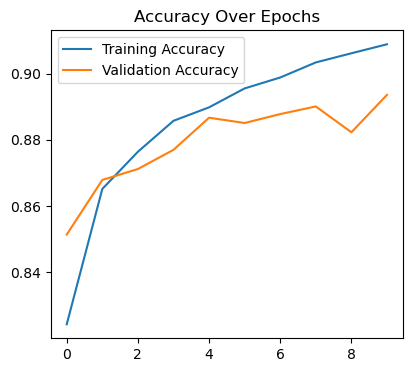

In [43]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

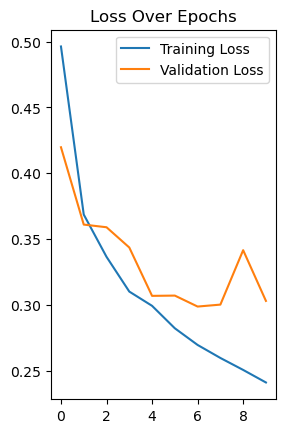

In [44]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

In [45]:
# Test accuracy
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print(f"\nNeural Network Test Accuracy: {test_acc:.4f}")


Neural Network Test Accuracy: 0.8936


## Compare All Models

In [70]:
print(f"\nNeural Network Test Accuracy: {test_acc:.4f}")
print(f"\nRandom Forest Model 1 Accuracy: {Random_Forest_Accuracy_Model1:.4f}")
print(f"\nRandom Forest Model 2 Accuracy: {Random_Forest_Accuracy_Model2:.4f}")
print(f"\nDecision Tree Accuracy: {Decision_Tree_Accuracy:.4f}")


Neural Network Test Accuracy: 0.8936

Random Forest Model 1 Accuracy: 0.8855

Random Forest Model 2 Accuracy: 0.8877

Decision Tree Accuracy: 0.7968
